## Transfer Learning MobileNetV2 using Keras

In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = .95
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,DirectoryIterator
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'gdrive/My Drive/Datasets/train'
valid_path = 'gdrive/My Drive/Datasets/test'


In [5]:
# Import the MobileNetV2 library and add preprocessing layer
# Here we will be using imagenet weights

mobilenet = MobileNetV2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

9412608/9406464 [==============================] - 0s 0us/step


In [6]:
# don't train existing weights
for layer in mobilenet.layers:
    layer.trainable = False

In [7]:
  # useful for getting number of output classes
folders = glob('gdrive/My Drive/Datasets/train/*')

In [8]:
# our layers - you can add more if you want
x = Flatten()(mobilenet.output)

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=mobilenet.input, outputs=prediction)

In [10]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
______________________________________________________________________________________________

In [11]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [12]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('gdrive/My Drive/Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [14]:
test_set = test_datagen.flow_from_directory('gdrive/My Drive/Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 106 images belonging to 4 classes.


In [15]:
from keras.callbacks import ModelCheckpoint
model_path = 'gdrive/My Drive/Models/MobileNetV2.h5'
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [16]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
  callbacks=callbacks_list
)

Epoch 1/20
61/61 [==============================] - 773s 12s/step - loss: 2.1962 - accuracy: 0.8124 - val_loss: 0.5039 - val_accuracy: 0.9245

Epoch 00001: val_accuracy improved from -inf to 0.92453, saving model to gdrive/My Drive/Models/MobileNetV2.h5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/20
61/61 [==============================] - 36s 585ms/step - loss: 0.5251 - accuracy: 0.9323 - val_loss: 0.2335 - val_accuracy: 0.9623

Epoch 00002: val_accuracy improved from 0.92453 to 0.96226, saving model to gdrive/My Drive/Models/MobileNetV2.h5
Epoch 3/20
61/61 [==============================] - 35s 579ms/step - loss: 0.5069 - accuracy: 0.9385 - val_loss: 1.2861 - val_accuracy: 0.8491

Epoch 00003: val_accuracy did not improve from 0.96226
Epoch 4/20
61/61 [==============================] - 35s 582ms/step - loss: 0.6317 - accuracy: 0.9354 - val_loss: 0.2247 - val_accuracy: 0.9623

Epoch 00004: val_accuracy did not improve from 0.96226
Epoch 5/20
61/61 [==============================] - 36s 585ms/step - loss: 0.3714 - accuracy: 0.9575 - val_loss: 0.4809 - val_accuracy: 0.9340

Epoch 00005: val_accuracy did not improve from 0.96226
Epoch 6/20
61/61 [==============================] - 35s 571ms/step - loss: 0.3258 - accuracy: 0.9621 - val_loss: 0.4087 - val_accuracy: 0.9623

E

In [17]:
import matplotlib.pyplot as plt

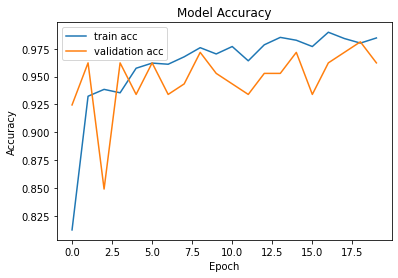

<Figure size 432x288 with 0 Axes>

In [18]:
# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='validation acc')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

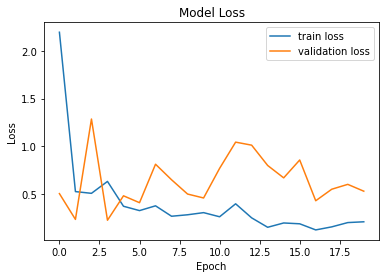

<Figure size 432x288 with 0 Axes>

In [19]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='validation loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

In [20]:
# save it as a h5 file
from tensorflow.keras.models import load_model

In [21]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np

# make predictions on the testing set
print("[INFO] evaluating network...")
y_pred = model.predict(test_set)

[INFO] evaluating network...


In [22]:
y_pred

array([[1.46185373e-34, 4.80306757e-17, 2.59563299e-38, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 6.41738733e-33, 1.77280845e-19],
       [4.15965362e-04, 6.93193725e-27, 0.00000000e+00, 9.99584019e-01],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 7.44361952e-25, 0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.55065484e-33, 2.08131301e-28, 1.00000000e+00],
       [6.07513259e-36, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [3.18000741e-37, 3.66560307e-36, 1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.93964091e-29, 0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.28416292e-37, 8.09651492e-24, 1.00000000e+00],
       [1.00000000e+00, 1.30661033e-24, 3.95564716e-24, 5.63244174e-36],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.89378278e-38, 0.00000000e+00, 0.00000000e

In [23]:
y_pred = np.argmax(y_pred, axis=1)

In [24]:
y_pred

array([3, 1, 3, 1, 3, 1, 3, 3, 2, 3, 3, 0, 1, 3, 2, 1, 3, 0, 1, 3, 2, 0,
       1, 3, 2, 3, 2, 1, 0, 1, 2, 1, 3, 2, 1, 1, 3, 3, 0, 0, 1, 0, 3, 2,
       0, 2, 2, 3, 0, 3, 2, 2, 0, 2, 0, 3, 3, 1, 1, 2, 3, 2, 3, 3, 2, 0,
       2, 1, 2, 2, 1, 1, 3, 0, 0, 2, 3, 0, 2, 1, 0, 1, 2, 3, 2, 1, 1, 1,
       0, 0, 2, 0, 2, 1, 1, 1, 2, 1, 0, 3, 2, 1, 3, 2, 0, 0])

In [25]:
#show a nicely formatted classification report
print(classification_report(test_set.labels, y_pred, target_names=['diseased cotton leaf','diseased cotton plant','fresh cotton leaf','fresh cotton plant']))

                       precision    recall  f1-score   support

 diseased cotton leaf       0.14      0.12      0.13        25
diseased cotton plant       0.21      0.21      0.21        28
    fresh cotton leaf       0.32      0.35      0.33        26
   fresh cotton plant       0.11      0.11      0.11        27

             accuracy                           0.20       106
            macro avg       0.19      0.20      0.20       106
         weighted avg       0.19      0.20      0.20       106



In [26]:
CM = confusion_matrix(test_set.labels, y_pred)
CM

array([[ 3,  7,  4, 11],
       [ 7,  6,  8,  7],
       [ 5,  5,  9,  7],
       [ 7, 10,  7,  3]])

Text(32.99999999999999, 0.5, 'True Labels')

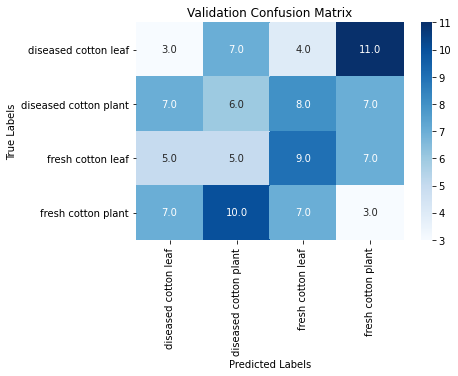

In [27]:
import seaborn as sn

plt.figure()
sn.heatmap(CM,annot=True,fmt = '.1f',xticklabels=['diseased cotton leaf','diseased cotton plant','fresh cotton leaf','fresh cotton plant'],yticklabels=['diseased cotton leaf','diseased cotton plant','fresh cotton leaf','fresh cotton plant'],cmap = 'Blues')
plt.title('Validation Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')